# Insolación

## Irradiancia promedio mensual

$\bar{H} = \dfrac{1}{N_{\rm dias}} \sum_{\rm dias}H_i$

## Irradiancia total diaria

$H = \Delta t \sum_{i=1}^N G_i$

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('temixcoEnero2019.csv', sep = ',', skiprows = 5)
df.columns = ["time", "Gb", "G", "Gd", "UV", "T", "phi", "v", "p"]
df.time = pd.to_datetime(df["time"], format = "%Y-%m-%d %H:%M:%S")
df.set_index(df['time'], inplace=True)
df.head()

,time,Gb,G,Gd,UV,T,phi,v,p
time,,,,,,,,,
2019-01-01 00:10:00,2019-01-01 00:10:00,0.182,0.0,0.0,0,18.29,59.84,1.385,875.1749
2019-01-01 00:20:00,2019-01-01 00:20:00,0.000,0.0,0.0,0,17.92,60.08,0.057,874.8231
2019-01-01 00:30:00,2019-01-01 00:30:00,0.066,0.0,0.0,0,17.91,61.51,0.003,874.7002
2019-01-01 00:40:00,2019-01-01 00:40:00,0.069,0.0,0.0,0,17.94,61.41,0.467,874.6029
2019-01-01 00:50:00,2019-01-01 00:50:00,0.000,0.0,0.0,0,17.69,61.27,0.438,874.8728


In [12]:
N = df.index.day.unique().values
dt = 10*60

H = []
for n in N:
    dfw = df[df.index.day == n]
    aux = dt * dfw.Gb.sum() / 1E6   # MJ/m2
    H.append(aux)

dfw = pd.DataFrame({'N':N, 'H': H})
dfw.to_csv('Enero2019.dat', index = False, sep ='\t')
dfw.head()

,N,H
0,1,25.675544
1,2,11.816564
2,3,11.147302
3,4,23.950518
4,5,21.745622


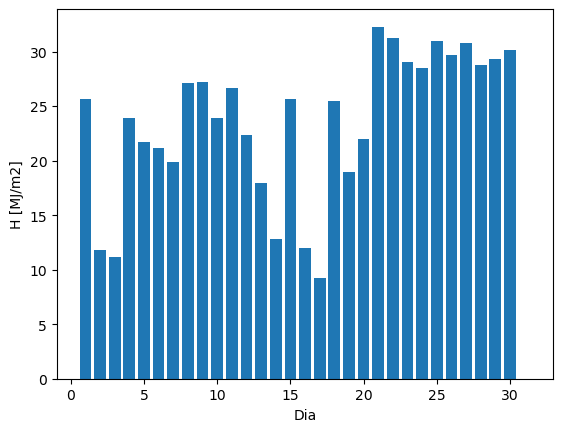

In [6]:
plt.xlabel("Dia")
plt.ylabel("H [MJ/m2]")
plt.bar(dfw.N, dfw.H)
plt.show()


In [7]:
Hm = dfw["H"].mean()
print("Irradiacion promedio mensual = %.2f MJ/m2" % Hm)

Irradiacion promedio mensual = 22.82 MJ/m2
